# 線形回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 100行1列の0~1の値
x = np.random.rand(100, 1)

In [3]:
x

array([[0.36320833],
       [0.50485451],
       [0.2811104 ],
       [0.94104785],
       [0.91617286],
       [0.33161876],
       [0.30421409],
       [0.31877535],
       [0.9652935 ],
       [0.83397653],
       [0.02142166],
       [0.7283415 ],
       [0.27408602],
       [0.7285326 ],
       [0.39023704],
       [0.62069864],
       [0.33846139],
       [0.75434952],
       [0.72470359],
       [0.0293129 ],
       [0.68708349],
       [0.73884452],
       [0.47660449],
       [0.85788049],
       [0.80459833],
       [0.51851985],
       [0.04054017],
       [0.5339249 ],
       [0.65774186],
       [0.50622877],
       [0.8517692 ],
       [0.05887264],
       [0.59962549],
       [0.01751989],
       [0.65880601],
       [0.14042769],
       [0.25269837],
       [0.57254963],
       [0.93076611],
       [0.4815151 ],
       [0.15972043],
       [0.52752801],
       [0.93061527],
       [0.03572129],
       [0.15527059],
       [0.36002322],
       [0.49101704],
       [0.628

In [7]:
# ノイズを加えて関数を定義　切片５、傾き３
y = 5 + 3 * x + np.random.rand(100, 1)

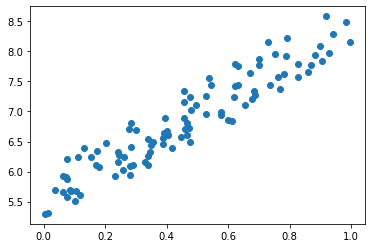

In [8]:
plt.scatter(x, y)

## 解析的方法　正規方程式

In [9]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression().fit(x, y.flatten())

In [22]:
lin_reg.intercept_, lin_reg.coef_  # 切片と傾き
# 切片５、傾き３に近い値が取れてる！

(5.55311086704374, array([2.80587433]))

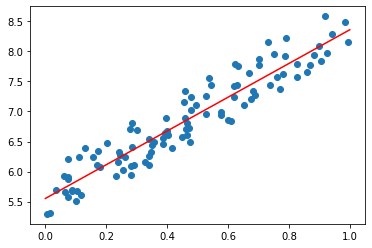

In [23]:
x_new = np.array([[0], [1]])
plt.plot(x_new, lin_reg.intercept_ + lin_reg.coef_ * x_new, c='red')
plt.scatter(x, y)

## 勾配降下法

In [26]:
from sklearn.linear_model import SGDRegressor

In [27]:
sgd_reg = SGDRegressor(max_iter=100).fit(x, y.flatten())

In [29]:
sgd_reg.intercept_, sgd_reg.coef_  # 切片5,傾き3に近い！！

(array([5.56195704]), array([2.73386084]))

In [31]:
sgd_reg_00001 = SGDRegressor(eta0=0.0001, max_iter=100).fit(x, y.flatten()) # max_iter:epochのこと、eta0:学習率のこと

C:\Users\genki\miniconda3\envs\mrcnn\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1228: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [38]:
sgd_reg_00001.intercept_, sgd_reg_00001.coef_  # 全然学習ができてない、、、学習率が低すぎるため

(array([0.84049454]), array([0.40856456]))

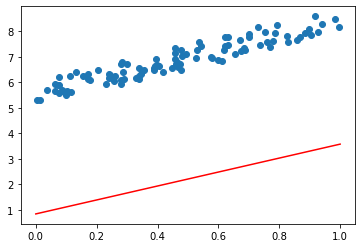

In [36]:
plt.plot(x_new, sgd_reg_00001.intercept_ + sgd_reg.coef_ * x_new, c='red')
plt.scatter(x, y)

In [39]:
sgd_reg_100 = SGDRegressor(eta0=100, max_iter=100).fit(x, y.flatten())

In [40]:
sgd_reg_100.intercept_, sgd_reg_100.coef_

(array([-1.03821003e+13]), array([8.18295792e+12]))

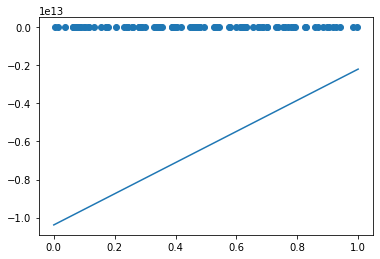

In [42]:
plt.plot(x_new, sgd_reg_100.intercept_ + sgd_reg_100.coef_ * x_new)
plt.scatter(x, y)